# Insper - Modelagem e Simulação do Mundo Físico

**Atividade de Implementação em Python - Aula 19**

**Implementação do problema da coxinha gigante - Termodinâmica**

**(1) Introdução**

Nesta atividade, vamos implementar o modelo que abstraímos no segundo video da aula 17.

Uma possível pergunta, a ser respondida por nosso modelo, seria: **qual o tempo necessário para que a temperatura do óleo atinja 190°C, em função de diferentes potências do aquecedor elétrico?**

Utilizaremos um recipiente de $1m$ x $1m$ x $0,6m$, com espessura de $5cm$, o qual estará repleto de óleo de soja.


<div>
    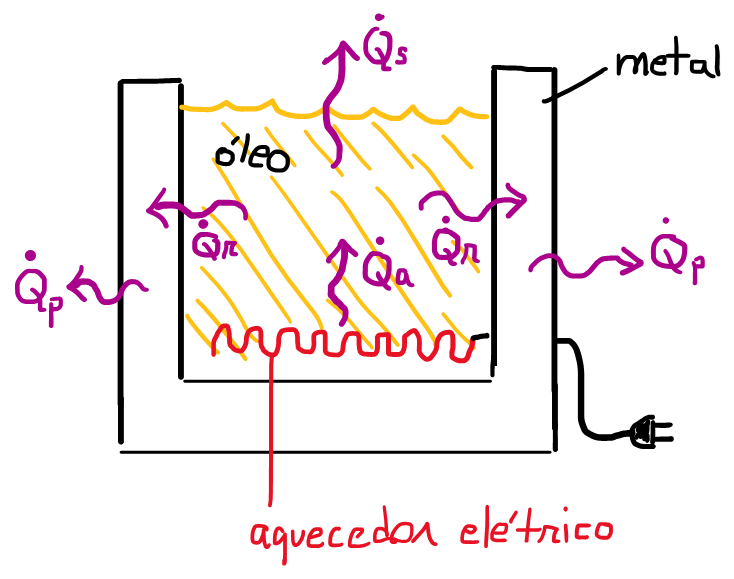
</div>


**(1.1) Obtenção de Dados Experimentais**

Antes de começarmos nossa implementação, vamos preparar os dados experimentais que serão usados em nossas validações do modelo. Estamos falando de dados medidos, os quais devem ser obtidos diretamente a partir de um **experimento** ou a partir de gráficos que você encontrar na literatura. 

Observe o código abaixo. Nele, implementamos uma função que retorna os dados medidos de tempo e temperatura.

In [42]:
#Verifique a função que fizemos: ela retorna duas listas, uma com os instantes de tempo e outra com as temperaturas medidas
def DadosMedidos():    
    lisTempoMedido=[0.0000,0.2312,0.4855,0.7630,1.0635,1.3872,1.6184,2.1040,2.6358,3.0751,3.6531,4.1156,4.7630,
5.2254,5.9653,6.6127,7.3063,8.0693,8.8323,9.7109,10.5433,11.2832,12.0231,12.8554,13.6184]
    lisTemperaturaMedida=[26.0000,35.9553,45.0446,54.6114,62.7381,72.3013,83.3102,92.8604,106.7220,119.1527,127.7366,139.2065,146.8260,
157.3370,163.9902,174.0070,178.7461,187.7947,190.6104,198.2115,201.9806,204.3187,206.6569,208.5081,210.3650]
    return [lisTempoMedido, lisTemperaturaMedida]


**(1.2) Verifique os dados!** 

O primeiro passo será a criação de um gráfico com os dados experimentais.
Usando a função **DadosMedidos**, que foi implementada no item anterior, plote um gráfico que mostre os dados experimentais. O resultado deve ser parecido com o da Figura 2.

<div>
   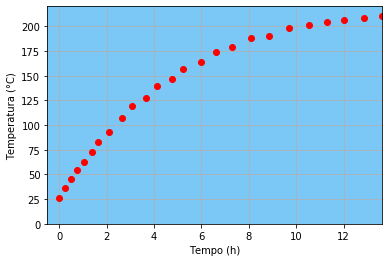
    <center><b>Figura 2: Dados experimentais da temperatura do óleo</b></center>
</div>

    

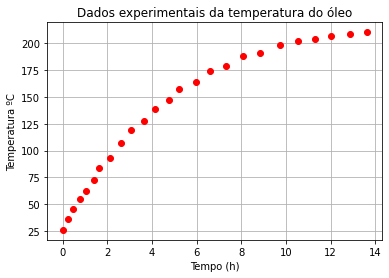

In [43]:
#FAÇA AQUI SEU CÓGIDO PARA PLOTAR OS DADOS EXPERIMENTAIS USANDO A FUNÇÃO DadosMedidos
import matplotlib.pyplot as plt

# a função dados medidos retorna um vetor de duas posições
# vamos separar os dados em variaveis diferentes

dados = DadosMedidos()
# posição 0 do vetor é o tempo
tempo = dados[0]
# posição 1 é a temperatura
temperatura = dados[1]

# agora com os eixos definidos bastar plotar

plt.plot(tempo,temperatura, 'ro')
plt.ylabel("Temperatura ºC")
plt.xlabel("Tempo (h)")
plt.title("Dados experimentais da temperatura do óleo")
plt.grid(True)
plt.show()




**(2) Primeira Iteração**

O diagrama de estoques e fluxos abaixo representa o modelo que construímos no segundo video da aula 17. Lembre-se de que iniciamos pelo equacionamento da energia interna do óleo  e do recipiente e, a partir da primeira lei da Termodinâmica e da lei da calorimetria, chegamos a duas equações diferenciais, uma para a temperatura do óleo e outra para a temperatura do recipiente.


<div>
    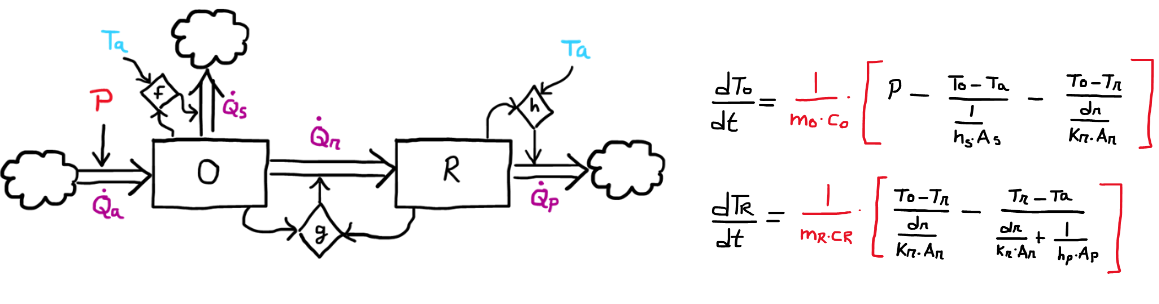
    <center><b>Figura 3: Modelo de estoques e fluxos da energia interna do óleo e do recipiente</b></center>
</div>



Lembre-se que nossas equações diferenciais podem ser escritas na forma (mais fácil de implementar):

$\frac{dT_o}{dt}=\frac{1}{m_o\cdot c_o}\cdot[\dot{Q_a}-\dot{Q_s}-\dot{Q_r}]$

$\frac{dT_r}{dt}=\frac{1}{m_r\cdot c_r}\cdot[\dot{Q_r}-\dot{Q_p}]$

Sendo:

$\dot{Q_a}=P$

$\dot{Q_s}=\frac{T_o-T_a}{\frac{1}{h_s\cdot A_s}}$

$\dot{Q_r}=\frac{T_o-T_r}{\frac{d_r}{k_r\cdot A_r}}$

$\dot{Q_p}=\frac{T_r-T_a}{\frac{d_r}{k_r\cdot A_r}+\frac{1}{h_p\cdot A_p}}$


Abaixo, inicializamos todos os parâmetros do problema. Observe todas as unidades e valores que usaremos no nosso modelo. Seria interessante se você procurasse por alguns desses valores como, por exemplo, o calor específico do óleo de soja, ou a condutividade térmica do aço (é mandatória a pesquisa em inglês, caso contrário, vocês encontrarão muito pouca informação). Se estiver confortável com todos os parâmetros, siga para o item 2.1. Aproveite, também, para preencher com comentários as unidades que não foram indicadas. 

In [44]:
#densidade do óleo de soja - 0,917 kg/L --> 917 kg/m3
do=917
#densidade do recipiente (latão) 8400 --> 8700 kg/m³
drec=8500
#volume de óleo - vamos deixar 10cm abaixo da altura do recipiente
# recipiente tem 1mx1mx0,6m e esperrusa de 0,05 m
vo=1*1*0.5
#volume do recipiente, sera 5x o volume de uma face
vr=0.05*1*1*5
#massa de óleo
mo=do*vo
#massa do recipiente
mr=drec*vr
#calor específico do óleo de soja (J/(kg*K))
co=1814.9
#calor específico do latão (J/(kg*K))
cr=377
#temperatura ambiente, em kelvin
Ta=26+273.15
#espessura do recipiente: 5cm --> 0.05m: vamos dividi-lo ao meio na modelagem da condução térmica
dr=0.05/2
#área da superfície de contato entre o óleo e o ar
As=1*1
#área de contato das paredes externas do recipiente
#são 4 paredes de 1m de largura por 0,6 de altura
Ap=0.6*1*4
#área de contato das paredes internas recipiente (vamos simplificar e igualá-las aqui)
Ar=Ap
#condutividade térmica do aço --> 80W/m*k
kr=160
#coeficiente de transferência convectiva da superfície do óleo para o ar --> 10W/m2k
hs=10
#coeficiente de transferência convectiva das paredes do recipiente para o ar --> 10W/m2k
hp=10
#potência térmica dos aquecedor --> 18kW
P=18000
#constante de Boltzman
sigma=5.6703e-8
#emissividade do oleo
emissividade = 0.95

**(2.1) Implementando a função que representa as equações diferenciais**

Você se lembra de que, para usar a função **ODEINT**, é necessário que o sistema esteja escrito na forma abaixo?

<div>
   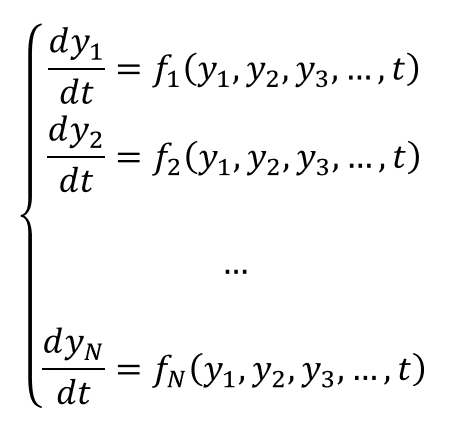  
</div>


A função **ODEINT** exige que implementemos uma função que represente o lado direito das igualdades do sistema acima. Sendo mais precisos, devemos implementar uma função que, a partir de uma **lista** $x=[y_1, y_2, ..., y_N]$ e do instante $t$, retorne uma **lista** $\frac{dx}{dt}=\left[ \frac{dy_1}{dt}, \frac{dy_2}{dt}, ..., \frac{dy_N}{dt} \right]$.

No caso que estamos analisando, temos $N=2$, com $y_1=T_o$ e $y_2=T_r$, certo? Assim, devemos implementar uma função que receba uma lista com os valores de $T_o$ e $T_r$, e o instante $t$, retornando uma lista com valor das derivadas $\frac{dT_o}{dt}$ e $\frac{dT_r}{dt}$.

Implemente essa função no espaço abaixo. Perceba que todos os parâmetros necessários para construí-la estão declarados acima. Se tiver alguma dúvida sobre os fluxos, resistências térmicas etc., consulte os vídeos da aula 17.


In [45]:
#IMPLEMENTE AQUI SUA FUNÇÃO QUE SERÁ USADA NO ODEINT

def derivada(x,t):
    # o primeiro parametro da função é a variavel a ser analisada
    # ela é um vetor pela definição da odeint
    # a primeira posição é Tóleo e na segunga Trecipiente
    To = x[0] 
    Tr = x[1] 
    # vamos escrever as derivadas agr, mas para isso dividir por partes a equação
    # primeiro as contantes fora do colchetes
    c_oleo = 1/(mo*co)
    c_rep = 1/(mr*cr)
    # agora as frações dentro da expressão do óleo
    # seja ol1 e al2 os nomes das frações
    ol1 = (To - Ta)*hs*As
    ol2 = (To - Tr)*kr*Ar*(1/dr)
    # faremos o mesmo para o recipiente
    # seja rp1 e rp as frações 
    rp1 = (To - Tr)*kr*Ar*(1/dr)
    # em rp2 temos duas frações internar
    # aux1 e aux2 os nomes delas
    aux1 = dr/(kr*Ar)
    aux2 = 1/(hp*Ap)
    # finalmente o valor de rp2
    rp2 = (Tr - Ta)/(aux1 + aux2)
    ############# escrevemos todas as sub contas, agora só escrever a derivada #############
    dTodt = c_oleo*(P - ol1 - ol2)
    dTrdt = c_rep*(rp1 - rp2)
    # guardamos as derivadas em um vetor para retornar na odeint
    dxdt = [dTodt,dTrdt]
    return dxdt


####################### agora usar odeint########################

**(2.2) Implementação da primeira iteração**

Vamos iniciar nossa implementação da primeira iteração do modelo. Para isso, siga os passos descritos a seguir:

**a)** Defina uma variável $\Delta t=1s$. Você deve estar se questionando: "mas um $\Delta t$ grande desses não reduzirá a precisão da resolução numérica?". Note que "grande" ou "pequeno" são conceitos relativos. Sistemas térmicos possuem (em sua maioria) dinâmicas bem lentas, normalmente analisados em minutos, horas ou até dias. Note que $1s$ é o mesmo que $0,017min$ ou $0,00028h$. Como todos os parâmetros e constantes estão no Sistema Internacional de Unidades (SI), nossa variável tempo deve ser, obrigatoriamente, medida em segundos. Poderíamos, no entanto, transformar todos os parâmetros que envolvem tempo em horas, usando um $\Delta t$ numericamente bem pequeno. Matematicamente, teríamos o mesmo resultado se usássemos um $\Delta t=0,00028h$, com todos os parâmetros em horas, ou um $\Delta t=1s$, estando todos os parêmetros em segundos.

**b)** Crie uma lista de tempo de $0$ a $50.000$ $s$. Para isso, use o $\Delta t$ declarado no item **a)**.

**c)** Crie uma lista com as temperaturas iniciais do óleo e do recipiente, que serão iguais à temperatura ambiente declarada acima por nós na célula que contém os parêmetros do problema.

**d)** Implemente a chamada da função **odeint**. Se precisar olhar códigos de aulas passadas, é uma boa hora!

Após rodar **odeint**, **plote um gráfico** das temperaturas do óleo e do recipiente **em graus Celsius** (se tudo está no SI, o resultado do **odeint** deve estar em Kelvin, certo?) em função do tempo decorrido, **em horas** (lembre-se de que sua lista de tempo está em segundos). No mesmo gráfico, plote também os dados experimentais e faça uma primeira validação do seu modelo.

Você deve obter algo semelhante ao mostrado na Figura 4.

<div>
    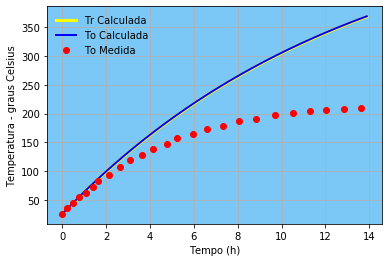
    <center><b>Figura 4: Resultado da primeira iteração do modelo</b></center>
</div>

   
Parece que a temperatura do óleo e do recipiente são iguais, não? Na verdade, elas são bem próximas por conta da baixa capacidade térmica do recipiente, o que significa que, dada a entrada de um fluxo de calor, o recipiente aquece muito rapidamente. Para ter certeza que as temperaturas não são iguais, dê um zoom num trecho do gráfico. Para isso, use a expressão: **plt.axis([x1,x2,y1,y2])**, na qual x1, x2, y1 e y2 definem o retângulo de zoom. Observe a figura 5, na qual demos um zoom no gráfico da Figura 4.

<div>
    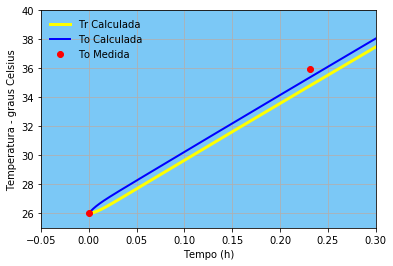
    <center><b>Figura 5: Zoom do Resultado da primeira iteração do modelo</b></center>
</div>




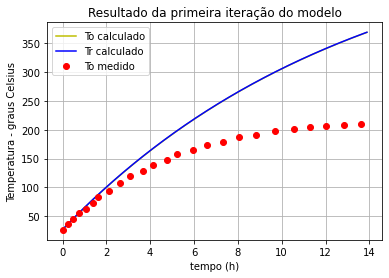

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

#IMPLEMENTE AQUI A PRIMEIRA ITERAÇÃO DO MODELO
# quando usar tempo sendo 1, colocar .0 para ele interpretar como float
delta_t = 1.0
# definido o intervalo de tempo criamos um vetor temporal fracionado de delta_t
# começando em 0 e terminando em 5e4, temos o eixo x definido
# as contantes iniciais, temperatura do oleo e recipiente são iguais do ambiente
to_0 = Ta
tr_0 = Ta
tempo_s = np.arange(0,5e4,delta_t)
# agora definimos as contantes iniciais
CI = [to_0,tr_0]
# tendo os parametros em maos podemos calcular as integrais do problema com odeint
temp = odeint(derivada,CI,tempo_s)
# temperatura retorna um vetor de duas posições 
# vamos separar as variaveis
To_lista_sup = temp[:,0]
Tr_lista_sup = temp[:,1]
# agora precisamos converter de K para C
# e converter o tempo em horas
tempo_h = []
for i in range(0,len(To_lista_sup)):
    To_lista_sup[i] = To_lista_sup[i] - 273.15  
    Tr_lista_sup[i] = Tr_lista_sup[i] - 272.15
    tempo_h.append(tempo_s[i]/3600)

########## estamos prontos para plotar o gráfico#################

plt.plot(tempo_h,To_lista_sup,'y', label = "To calculado")
plt.plot(tempo_h,Tr_lista_sup, 'b', label = "Tr calculado")
plt.plot(tempo,temperatura, 'ro', label = "To medido")
plt.ylabel("Temperatura - graus Celsius")
plt.xlabel("tempo (h)")
plt.legend()
plt.title("Resultado da primeira iteração do modelo")
plt.grid(True)
plt.show()










**(3) Segunda Iteração**

Percebeu que os resultados de nossa primeira iteração não estão tão próximos dos dados medidos? Parece que nosso modelo está resultando em um aquecimento do óleo mais rápido do que mostram os dados experimentais. Será que podemos iterar nosso modelo de modo a torná-lo válido? Que tipo de fluxo de calor que deixamos de fora em nossa primeira iteração? Radiação, né?

Veja a inclusão do fluxo de radiação na Figura 6, conforme discutimos na video aula 17.

<div>
    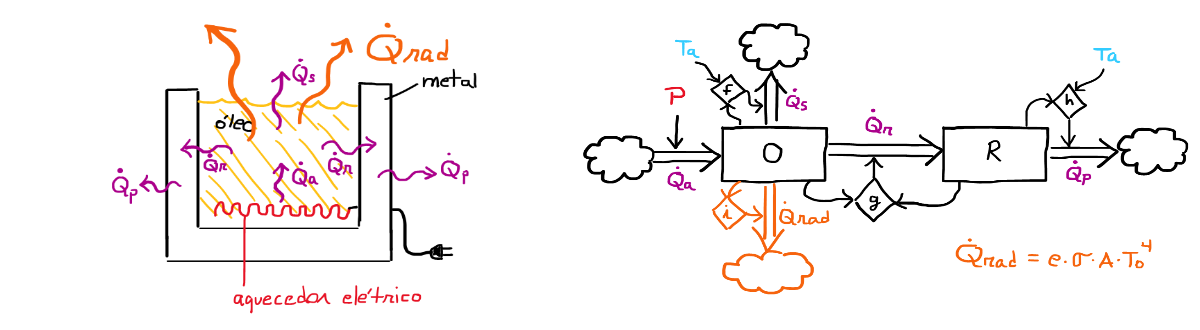
    <center><b>Figura 6: Modelo de estoques e fluxos da energia interna do óleo com radiação</b></center>
</div>

**(3.1) Implementação da segunda iteração**

Implemente novamente, usando o espaço abaixo, a função que é utilizada pelo **odeint** para calcular as derivadas $\frac{dT_o}{dt}$ e $\frac{dT_r}{dt}$, agora levando em consideração a perda de calor do óleo por radiação. Utilize a lei de Stefan Boltzmann, dada por $\dot{Q_{rad}}=e\cdot \sigma \cdot A\cdot T_o^4$. Aqui, é importante observar que a área a ser usada na equação da radiação é apenas a área da superfície, pois as paredes de metal têm a propriedade de refletir a radiação emitida pelo óleo.


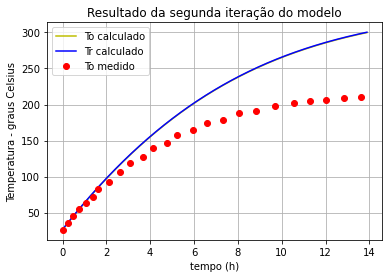

In [56]:
#IMPLEMENTE AQUI A SEGUNDA ITERAÇÃO DO MODELO
def modelo(x,t):
    # em relação a função derivada falta considerar qrad em óleo, como saída
    # o primeiro parametro da função é a variavel a ser analisada
    # ela é um vetor pela definição da odeint
    # a primeira posição é Tóleo e na segunga Trecipiente
    To = x[0] 
    Tr = x[1] 
    # vamos escrever as derivadas agr, mas para isso dividir por partes a equação
    # primeiro as contantes fora do colchetes
    c_oleo = 1/(mo*co)
    c_rep = 1/(mr*cr)
    # agora as frações dentro da expressão do óleo
    # seja ol1, ol2 e ol3 os nomes das frações
    ol1 = (To - Ta)*hs*As
    ol2 = (To - Tr)*kr*Ar*(1/dr)
    ol3 = emissividade*sigma*As*(To**4)
    # faremos o mesmo para o recipiente
    # seja rp1 e rp as frações 
    rp1 = (To - Tr)*kr*Ar*(1/dr)
    # em rp2 temos duas frações internar
    # aux1 e aux2 os nomes delas
    aux1 = dr/(kr*Ar)
    aux2 = 1/(hp*Ap)
    # finalmente o valor de rp2
    rp2 = (Tr - Ta)/(aux1 + aux2)
    ############# escrevemos todas as sub contas, agora só escrever a derivada #############
    dTodt = c_oleo*(P - ol1 - ol2 - ol3)
    dTrdt = c_rep*(rp1 - rp2)
    # guardamos as derivadas em um vetor para retornar na odeint
    dxdt = [dTodt,dTrdt]
    return dxdt

temp_2 = odeint(modelo,CI,tempo_s)
# temperatura retorna um vetor de duas posições 
# vamos separar as variaveis
To_lista_sup_2 = temp_2[:,0]
Tr_lista_sup_2 = temp_2[:,1]
# agora precisamos converter de K para C
# e converter o tempo em horas
for i in range(0,len(To_lista_sup_2)):
    To_lista_sup_2[i] = To_lista_sup_2[i] - 273.15  
    Tr_lista_sup_2[i] = Tr_lista_sup_2[i] - 272.15

##########estamos prontos para plotar o gráfico#################

plt.plot(tempo_h,To_lista_sup_2,'y', label = "To calculado")
plt.plot(tempo_h,Tr_lista_sup_2, 'b', label = "Tr calculado")
plt.plot(tempo,temperatura, 'ro', label = "To medido")
plt.ylabel("Temperatura - graus Celsius")
plt.xlabel("tempo (h)")
plt.legend()
plt.title("Resultado da segunda iteração do modelo")
plt.grid(True)
plt.show()



Com a inclusão da radiação, o modelo ficou melhor? Ainda não está bom, não é? Vamos à validação propriamente dita.

**(4) Validação dos resultados** 


Embora tenhamos feito uma comparação com dados experimentais nos nossos dois modelos (itearação 1 e iteração 2), ainda precisamos avaliar o modelo a partir de uma análise de nossos parâmetros, observando se estão bem ajustados ao nosso problema. Um dos parâmetros que costuma ter muita variabilidade em termodinâmica, diferentemente da massa, calor específico, dimensões em geral, é o **coeficiente de convecção do ar** (ou do vapor/gases). Procure rapidamente na internet por "air convection coefficient".  Você verá que, em alguns sites, esse coeficiente é especificado numa faixa de valores - $10$ a $100$ $W/(m^2\cdot K)$. No nosso modelo, estamos usando $h_s=h_p=10$ $W/(m^2\cdot K)$.

Na célula abaixo, copie o código que implementou no item 3.1 e redefina os parâmetros **$h_s$** e **$h_p$** (ambos se referem à convecção no ar). Será que você consegue encontrar um **$h_s$** e um **$h_p$** (**dentro da faixa de possíveis valores**) que ajuste o modelo para ficar parecido com a Figura 7?

<div>
    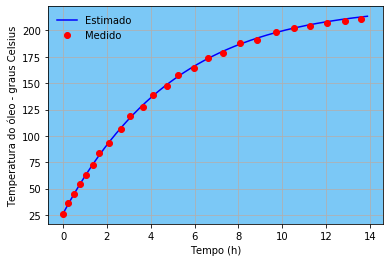
    <center><b>Figura 7: Ajuste do coeficiente de convecção do ar para validar nosso modelo</b></center>
</div>


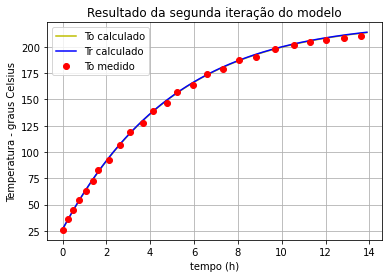

In [67]:
#ALTERE AQUI OS PARÂMETROS h E VALIDE O MODELO

hs = 22
hp = 22

temp_2 = odeint(modelo,CI,tempo_s)
# temperatura retorna um vetor de duas posições 
# vamos separar as variaveis
To_lista_sup_2 = temp_2[:,0]
Tr_lista_sup_2 = temp_2[:,1]
# agora precisamos converter de K para C
# e converter o tempo em horas
for i in range(0,len(To_lista_sup_2)):
    To_lista_sup_2[i] = To_lista_sup_2[i] - 273.15  
    Tr_lista_sup_2[i] = Tr_lista_sup_2[i] - 272.15

##########estamos prontos para plotar o gráfico#################

plt.plot(tempo_h,To_lista_sup_2,'y', label = "To calculado")
plt.plot(tempo_h,Tr_lista_sup_2, 'b', label = "Tr calculado")
plt.plot(tempo,temperatura, 'ro', label = "To medido")
plt.ylabel("Temperatura - graus Celsius")
plt.xlabel("tempo (h)")
plt.legend()
plt.title("Resultado da segunda iteração do modelo")
plt.grid(True)
plt.show()





**(5) Tirando conclusões sobre o modelo** 

Agora que você já conseguiu validar seu modelo, ou seja, certificar-se de que ele é confiável e reproduz razoavelmente bem um fenômeno físico, podemos começar a tirar conclusões a partir dele, certo? Por exemplo, podemos simular o modelo com parâmetros diferentes, ou condições iniciais diferentes, extraindo dele novas informações. Na verdade, essa é uma competência que queremos muito desenvolver em ModSim, e que achamos que é a essência da engenharia. Afinal, se podemos criar um modelo que **explica** os dados experimentais, podemos, também - dentro de limites -, usá-lo para **prever** resultados que só poderiam ser obtidos com novas experimentações, gerelmente a um alto custo. Certo?

Assim, neste item desafio, queremos que você elabore um gráfico que permita dizer **qual é o tempo necessário para que o óleo atinja 190 °C _em função_ da potência do aquecedor**. Ou seja, em vez de executar o **odeint** uma única vez para a potência **P** definida no início do item **2** e observar como a temperatura varia em função do tempo, você deverá executá-la algumas vezes e, em cada vez, deverá registrar o tempo necessário para atingir 190 °C. Por fim, registrará essas combinações de tempo e potência em uma única figura. 

Se precisar de orientação para fazer isso, siga os seguintes passos:

**a)** Copie, na célula abaixo, a função que você implementou no item **3.1**. Renomeie-a como quiser e modifique-a para que receba, além dos valores obrigatórios $x$ e $t$, a potência **P** do aquecedor.

**b)** Implemente um loop para que a função **odeint** seja chamada 5 vezes, uma para cada potência de aquecedor diferente. Você precisará de uma lista com as 5 potências de aquecedores, certo? Para começar, você pode criar uma lista com as potências de $18kW$, $25kW$, $30kW$, $40kW$ e $50kW$.

**c)** Plote um gráfico do tempo necessário para atingir 190°C (ou seja, no eixo das ordenadas teremos o tempo, em **horas**, e no eixo das abscissas, a potência do queimador, em $kW$). Talvez você ache melhor construir uma função que recebe as listas de temperatura e tempo e retorna o tempo que demorou para atingir 190 °C.

Muito difícil? Não hesite em pedir a ajuda ao professor.

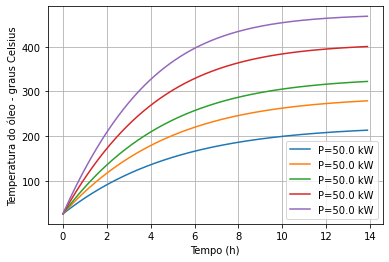

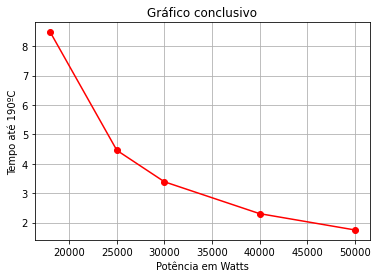

In [78]:
#IMPLEMENTE AQUI O CÓDIGO PARA GERAR UM GRÁFICO CONCLUSIVO
def modelo_hard(x,t,P):
    # em relação a função derivada falta considerar qrad em óleo, como saída
    # o primeiro parametro da função é a variavel a ser analisada
    # ela é um vetor pela definição da odeint
    # a primeira posição é Tóleo e na segunga Trecipiente
    To = x[0] 
    Tr = x[1] 
    # vamos escrever as derivadas agr, mas para isso dividir por partes a equação
    # primeiro as contantes fora do colchetes
    c_oleo = 1/(mo*co)
    c_rep = 1/(mr*cr)
    # agora as frações dentro da expressão do óleo
    # seja ol1, ol2 e ol3 os nomes das frações
    ol1 = (To - Ta)*hs*As
    ol2 = (To - Tr)*kr*Ar*(1/dr)
    ol3 = emissividade*sigma*As*(To**4)
    # faremos o mesmo para o recipiente
    # seja rp1 e rp as frações 
    rp1 = (To - Tr)*kr*Ar*(1/dr)
    # em rp2 temos duas frações internar
    # aux1 e aux2 os nomes delas
    aux1 = dr/(kr*Ar)
    aux2 = 1/(hp*Ap)
    # finalmente o valor de rp2
    rp2 = (Tr - Ta)/(aux1 + aux2)
    ############# escrevemos todas as sub contas, agora só escrever a derivada #############
    dTodt = c_oleo*(P - ol1 - ol2 - ol3)
    dTrdt = c_rep*(rp1 - rp2)
    # guardamos as derivadas em um vetor para retornar na odeint
    dxdt = [dTodt,dTrdt]
    return dxdt

# vamos criar uma função para calcular o tempo até atingir 190ºC, 
# e guardar o valor de cada curva

# função para guardar a temperatura até atingir 190 graus
def tempoAte190(temperaturaoleo,tempoh):
    i = 0
    
    # enquanto o tempo for menor que 190 não guarda a temperatura
    while(temperaturaoleo[i] < 190):
        i +=1
    return tempoh[i]

#lista com as contantes da potencia
P = [18e3,25e3,30e3,40e3,50e3]

# p[i] é argumento da odenint
# devemos rodar um for para executa-la com todos os paretros do nosso vetor

# vetor nulo para guardar os tempos até 190
tempo_190 = []

for i in P:
    # é a posição do vetor, logo a potencia em questão
    # o nome da função agora é modelo_hard, com 3 parametros
    # como tempo_s já foi definido anteriormente não precisamos cria-lo novamente
    # o mesmo vale para tempo_h
    temp_2 = odeint(modelo_hard, CI,tempo_s, args = (i,))
    # temperatura retorna um vetor de duas posições 
    # vamos pegar só a primeira, é a que queremos
    To_lista_sup_2 = temp_2[:,0]
    # agora precisamos converter de K para C
    for i in range(0,len(To_lista_sup_2)):
        To_lista_sup_2[i] = To_lista_sup_2[i] - 273.15
    # após convertido para celcius podemos guardar o tempo até atingir 190ºC
    # com a função criada ira varrer os valores da lista temperatura
    # e pegar o valor da lista tempo correspondete
    tempo_190.append(tempoAte190(To_lista_sup_2,tempo_h))
    
    # depois de convertido vamos dar o comando do plot    
    plt.plot(tempo_h,To_lista_sup_2, label=("P=%.1f kW" %(i/1000)))

##########estamos prontos para plotar o gráfico#################

plt.ylabel("Temperatura do óleo - graus Celsius")
plt.xlabel("Tempo (h)")
plt.legend()
plt.grid(True)
plt.show()

############# agora o gráfico conclusivo#####################

plt.plot(P,tempo_190, "r-o")
plt.ylabel("Tempo até 190ºC")
plt.xlabel("Potência em Watts")
plt.grid(True)
plt.title("Gráfico conclusivo")
plt.show()

E aí, dá pra saber pelo gráfico qual a potência necessária para atingir 190 °C em menos de $3$ $h$?